# Data Cleaning with Pandas

## Basic Step

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


## Solve Missing Value with Pandas 

In [3]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [4]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

## Non Standart Missing Values with Pandas

In [5]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [6]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [7]:
missing_value = ['n/a','--','na']

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_value)

In [9]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [10]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

## Unexpected Missing Value

In [11]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [12]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [13]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try :
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt+=1

In [14]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Summarizing Missing Value 

In [15]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [16]:
# Cara cepat apakah terdapat nilai yang hilang
df.isnull().values.any()

True

In [17]:
df.isnull().sum().sum()

12

## Replacing

In [18]:
# Ketika mengisi missing value dengan satu value 125
df['ST_NUM'].fillna(125, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [19]:
# Mengisi missing value berdasarkan lokasi-nya
df.loc[2, 'ST_NUM'] = 125

In [20]:
# Cara paling umum, mengisi dengan rata rata nilai (median)
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Analyzing Obesity in England

In [21]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [22]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [23]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [24]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [25]:
data_age.dropna(inplace=True)

In [26]:
data_age.set_index('Year', inplace=True)

In [27]:
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

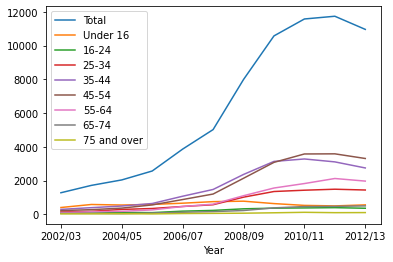

In [28]:
data_age.plot()

In [29]:
dates_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

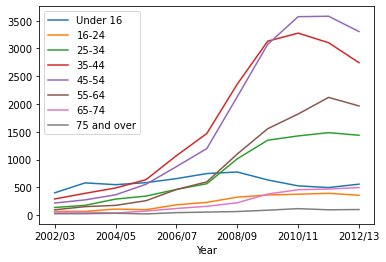

In [30]:
dates_age_minus_total.plot()

So, Who is getting fatter?

<AxesSubplot:xlabel='Year'>

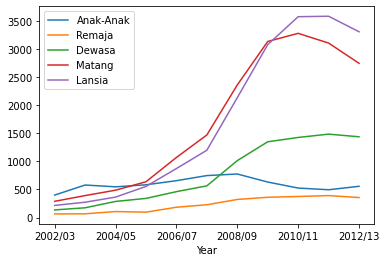

In [31]:
dates_age_minus_total['Under 16'].plot(label='Anak-Anak', legend=True)
dates_age_minus_total['16-24'].plot(label='Remaja', legend=True)
dates_age_minus_total['25-34'].plot(label='Dewasa', legend=True)
dates_age_minus_total['35-44'].plot(label='Matang', legend=True)
dates_age_minus_total['45-54'].plot(label='Lansia', legend=True)

## Times Series 

### Basic Times Series Manipulation

In [32]:
from datetime import datetime

In [33]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [34]:
df = pd.DataFrame(date_rng, columns=['date'])

In [35]:
df['data'] = np.random.randint(0, 100, size=len(date_rng))
df

,date,data
0,2020-01-01 00:00:00,93
1,2020-01-01 01:00:00,73
2,2020-01-01 02:00:00,37
3,2020-01-01 03:00:00,47
4,2020-01-01 04:00:00,32
...,...,...
164,2020-01-07 20:00:00,59
165,2020-01-07 21:00:00,83
166,2020-01-07 22:00:00,67
167,2020-01-07 23:00:00,90


In [36]:
df['datetime'] = pd.to_datetime(df['date'])

In [37]:
df = df.set_index('datetime')

In [38]:
df.drop(['date'], axis=1, inplace=True)

In [39]:
df

,data
datetime,
2020-01-01 00:00:00,93
2020-01-01 01:00:00,73
2020-01-01 02:00:00,37
2020-01-01 03:00:00,47
2020-01-01 04:00:00,32
...,...
2020-01-07 20:00:00,59
2020-01-07 21:00:00,83
2020-01-07 22:00:00,67


In [40]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [41]:
time_stamp_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
time_stamp_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

Make unique string

In [42]:
string_date_rngng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [43]:
time_stamp_rnge_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rngng_2]
time_stamp_rnge_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [44]:
df2 = pd.DataFrame(time_stamp_rnge_2, columns=['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


Back to our real DataFrame

In [45]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,75
2020-01-02 01:00:00,36
2020-01-02 02:00:00,28
2020-01-02 03:00:00,76
2020-01-02 04:00:00,19
2020-01-02 05:00:00,98
2020-01-02 06:00:00,71
2020-01-02 07:00:00,91
2020-01-02 08:00:00,67


In [46]:
df.loc['2020-01-03']

,data
datetime,
2020-01-03 00:00:00,61
2020-01-03 01:00:00,87
2020-01-03 02:00:00,99
2020-01-03 03:00:00,7
2020-01-03 04:00:00,63
2020-01-03 05:00:00,77
2020-01-03 06:00:00,40
2020-01-03 07:00:00,60
2020-01-03 08:00:00,1


In [47]:
df['2020-01-03':'2020-01-06']

,data
datetime,
2020-01-03 00:00:00,61
2020-01-03 01:00:00,87
2020-01-03 02:00:00,99
2020-01-03 03:00:00,7
2020-01-03 04:00:00,63
...,...
2020-01-06 19:00:00,35
2020-01-06 20:00:00,43
2020-01-06 21:00:00,96


In [48]:
df.resample('D').mean()

,data
datetime,
2020-01-01,47.625000
2020-01-02,45.666667
2020-01-03,46.416667
2020-01-04,45.333333
2020-01-05,56.833333
2020-01-06,63.625000
2020-01-07,52.583333
2020-01-08,60.000000


In [49]:
df['rolling_sum'] = df.rolling(3).sum()
df

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,93,NaN
2020-01-01 01:00:00,73,NaN
2020-01-01 02:00:00,37,203.0
2020-01-01 03:00:00,47,157.0
2020-01-01 04:00:00,32,116.0
...,...,...
2020-01-07 20:00:00,59,119.0
2020-01-07 21:00:00,83,154.0
2020-01-07 22:00:00,67,209.0


Kita dapat melihat bahwa pandas menghitung dengan benar dan hanya memiliki nilai yang valid ketika ada 3 periode untuk melihat ke belakang.

ini adalah kesempatan bagus untuk melihat bagaimana kita dapat melakukan forward dan backfilling data saat bekerja dengan dengan nilai data yang hilang.

In [50]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,93,NaN,203.0
2020-01-01 01:00:00,73,NaN,203.0
2020-01-01 02:00:00,37,203.0,203.0
2020-01-01 03:00:00,47,157.0,157.0
2020-01-01 04:00:00,32,116.0,116.0
...,...,...,...
2020-01-07 20:00:00,59,119.0,119.0
2020-01-07 21:00:00,83,154.0,154.0
2020-01-07 22:00:00,67,209.0,209.0


### TimeSeries on Dataset 

In [51]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [52]:
opsd_daily = opsd_daily.set_index('Date')

In [53]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

Alternatif dari kode yang banyak diatas kita dapat menjadikan-nya menjadi satu baris saja

In [54]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [55]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [56]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [57]:
opsd_daily.loc['2006-12-23']

Consumption    1235.688
Wind                NaN
Solar               NaN
Wind+Solar          NaN
Year           2006.000
Month            12.000
Weekday           5.000
Name: 2006-12-23 00:00:00, dtype: float64

In [58]:
opsd_daily.loc['2006-01-23':'2006-01-30']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-23,1569.691,NaN,NaN,NaN,2006,1,0
2006-01-24,1603.252,NaN,NaN,NaN,2006,1,1
2006-01-25,1613.312,NaN,NaN,NaN,2006,1,2
2006-01-26,1601.673,NaN,NaN,NaN,2006,1,3
2006-01-27,1586.065,NaN,NaN,NaN,2006,1,4
2006-01-28,1373.030,NaN,NaN,NaN,2006,1,5
2006-01-29,1252.215,NaN,NaN,NaN,2006,1,6
2006-01-30,1554.722,NaN,NaN,NaN,2006,1,0


In [59]:
opsd_daily.loc['2008-12']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2008-12-01,1491.789,NaN,NaN,NaN,2008,12,0
2008-12-02,1538.111,NaN,NaN,NaN,2008,12,1
2008-12-03,1541.102,NaN,NaN,NaN,2008,12,2
2008-12-04,1535.108,NaN,NaN,NaN,2008,12,3
2008-12-05,1474.000,NaN,NaN,NaN,2008,12,4
2008-12-06,1254.080,NaN,NaN,NaN,2008,12,5
2008-12-07,1167.657,NaN,NaN,NaN,2008,12,6
2008-12-08,1486.874,NaN,NaN,NaN,2008,12,0
2008-12-09,1517.789,NaN,NaN,NaN,2008,12,1


<AxesSubplot:xlabel='Date'>

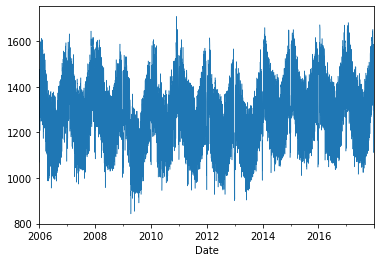

In [60]:
opsd_daily['Consumption'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

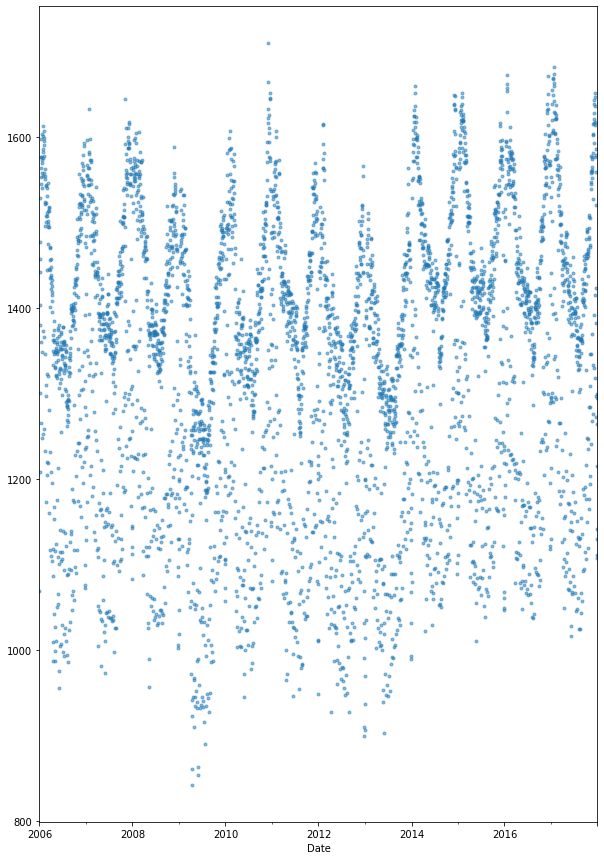

In [61]:
opsd_daily['Consumption'].plot(marker='.', alpha=.5, linestyle='None', figsize=(10,15))

<AxesSubplot:xlabel='Date'>

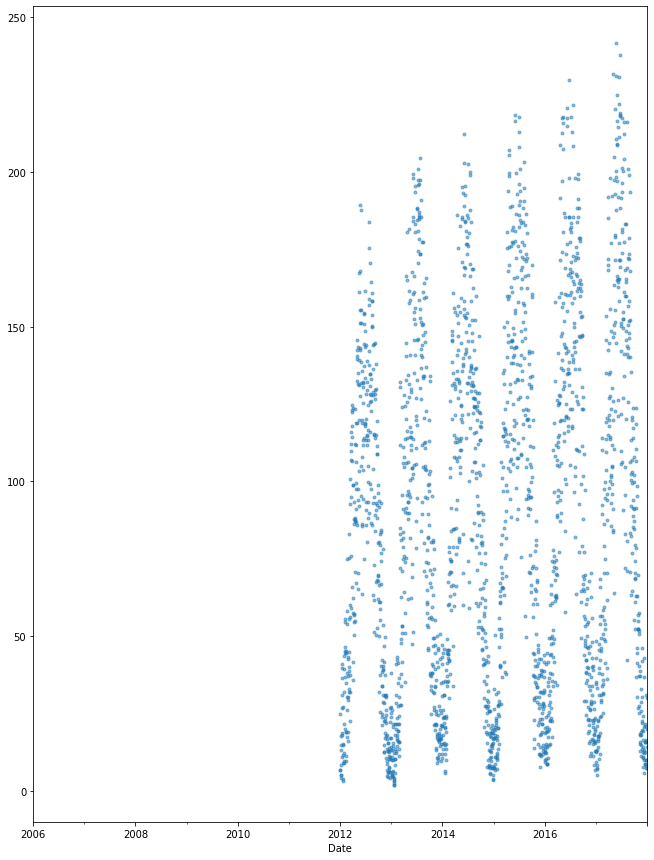

In [62]:
opsd_daily['Solar'].plot(marker='.', alpha=.5, linestyle='None', figsize=(11,15))

<AxesSubplot:xlabel='Date'>

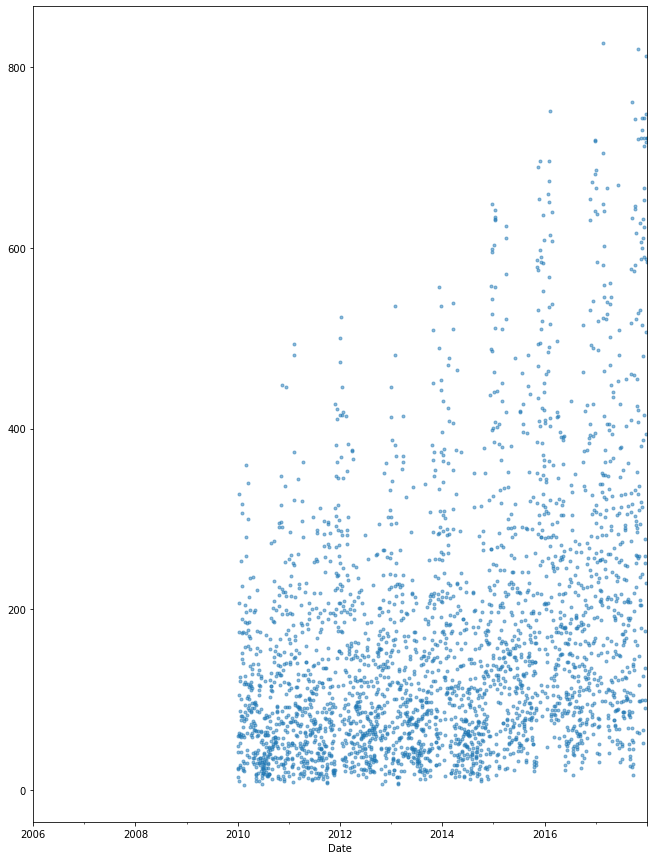

In [63]:
opsd_daily['Wind'].plot(marker='.', alpha=.5, linestyle='None', figsize=(11,15))

Text(0, 0.5, 'Daily Consumption (GWH)')

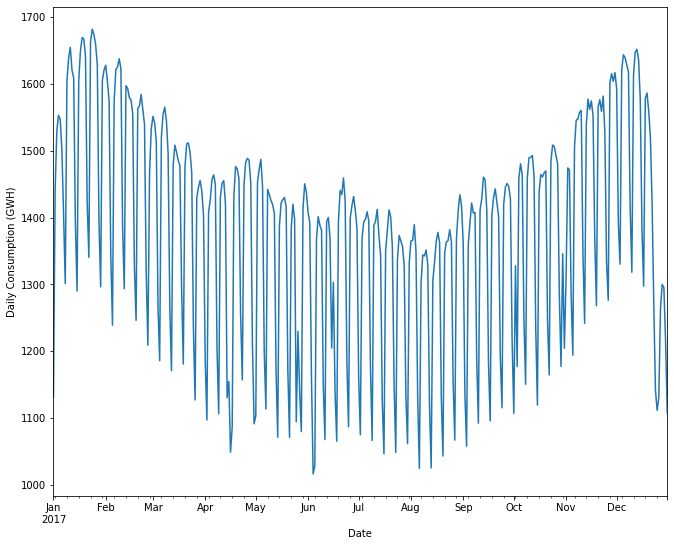

In [64]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,9))
ax.set_ylabel("Daily Consumption (GWH)")

Mari perbesar lagi

Text(0, 0.5, 'Daily Consumption (GWH)')

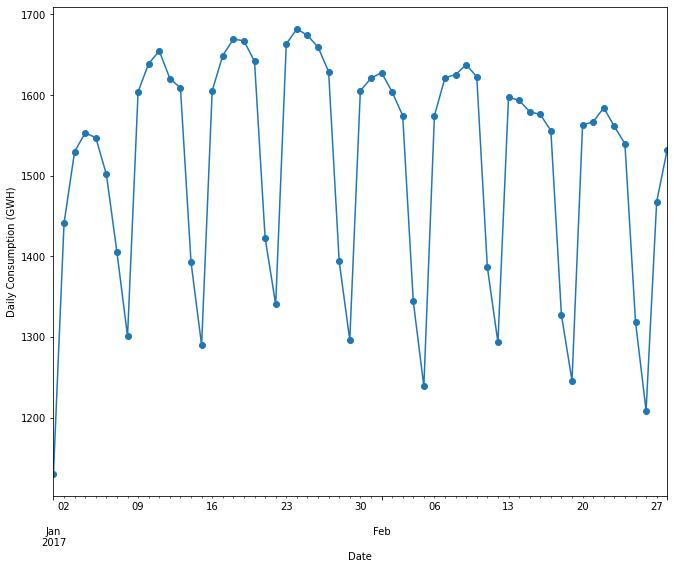

In [65]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11,9))
ax.set_ylabel("Daily Consumption (GWH)")

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

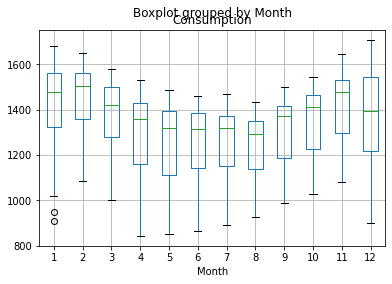

In [66]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

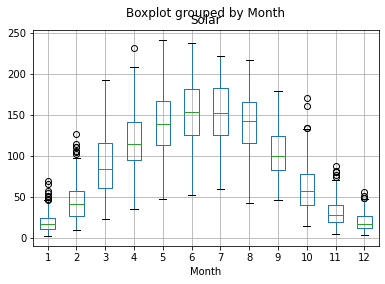

In [67]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

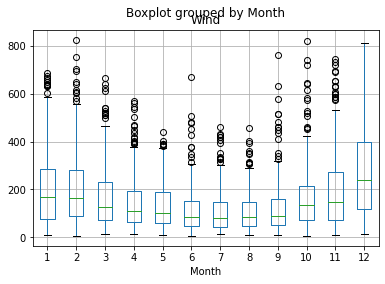

In [68]:
opsd_daily.boxplot(column=['Wind'], by='Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

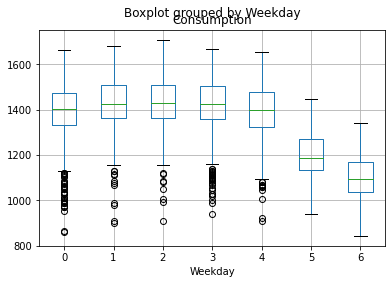

In [69]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

In [70]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [71]:
print(opsd_daily.shape)
print(opsd_weekly_mean.shape)

(4383, 7)
(627, 4)


<AxesSubplot:xlabel='Date'>

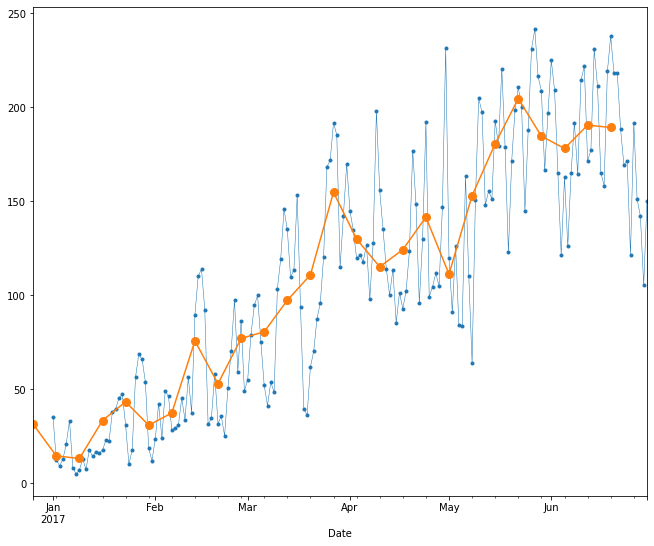

In [72]:
start, end = '2017-01', '2017-06'
opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))